# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
# EXAMPLE PYTHON CELL

df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,12,99
1,49,66
2,4,93
3,35,54
4,96,18


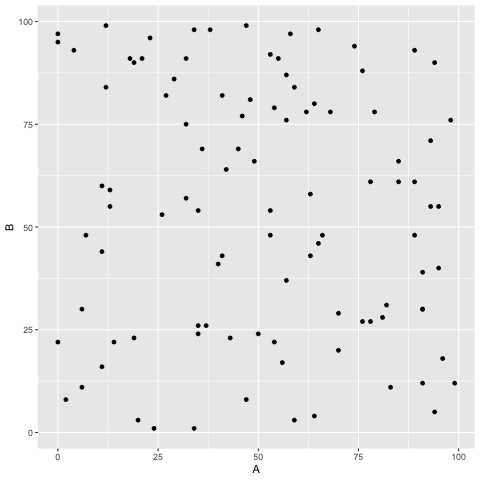

In [5]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Load the data

In [6]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [7]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




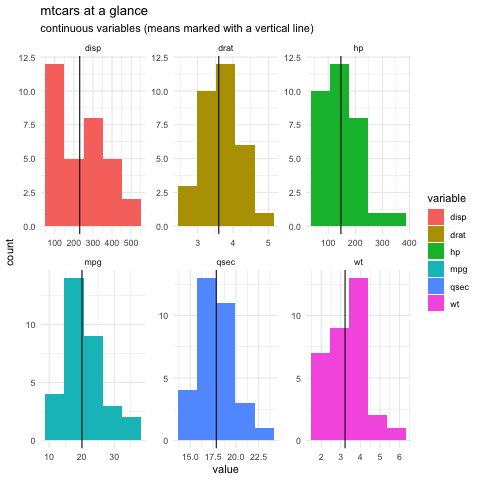

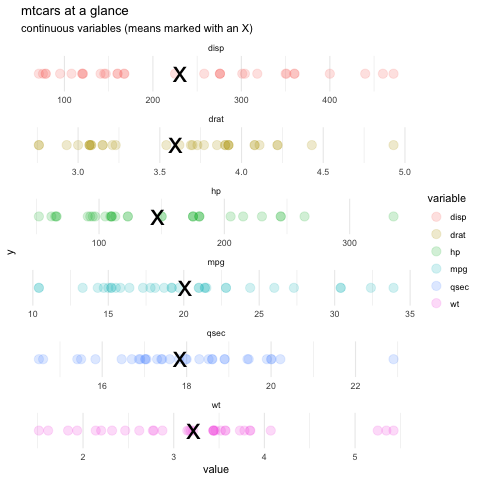

In [8]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

# plot only continuous variables
to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)

histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

plot_continuous_histograms <- ggplot(to_plot) +
    aes(x=value, fill=variable, group=variable) +
    geom_histogram(bins=5) +
    geom_vline(data=histogram_means, aes(xintercept=mean)) +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='continuous variables (means marked with a vertical line)')


plot_continuous_dotplot <- ggplot(to_plot) +
    aes(x=value, y=1, color=variable) +
    geom_point(size=4, alpha=.2) +
    stat_summary(fun.y= mean, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    facet_wrap(~variable, scales='free', ncol=1) +
    theme_minimal() +
    labs(
        title = 'mtcars at a glance', 
        subtitle='continuous variables (means marked with an X)'
    ) +
    theme(
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank(),  #remove y axis ticks
            panel.grid.major.y = element_blank(), #remove y axis grid
            panel.grid.minor.y = element_blank(), #remove y axis grid
    )

# plot_continuous

# display both plots
print(plot_continuous_histograms)
print(plot_continuous_dotplot)

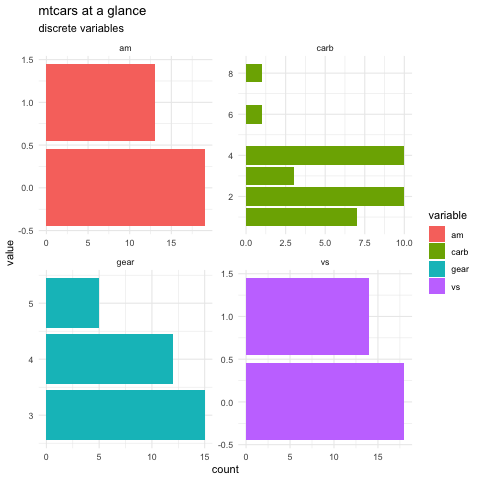

In [9]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

👉 What can we conclude about this dataset from the charts above?

- Most cars have 4 or fewer than 4 carbruetors (carbs).
- The transmission type, number of gears, and vs distribution show that fewer cars have higher values in these categories.
- From the distribution of the rear axle ratio, horsepower, fuel efficiency, and 1/4 mile time, it seems like the data of these fields are mostly clustered around the average. The shape of the distributions are quite similar.
- From the distribution of continuous variables, we can see that there are presence of outliers with high values in these categories.

👉 What can we not conclude about this dataset from the charts above?

- We can't tell that if rear axle ratio, horsepower, fuel efficiency, and 1/4 mile time are directly related. 
- We can't tell if a car with more gears must have more carbeutors.
- We can't tell that the outliers shown in the continuous variable distributions are the same model of cars.

👉 What further questions about this data do you have now? 

- Are some of the fields directly related (i.e. have a positive/negative correlation)?
- The outliers in the distribution: are these the same cars?
- Why is the distribution of displacement unlike the others, with a bimodal ditribution?

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


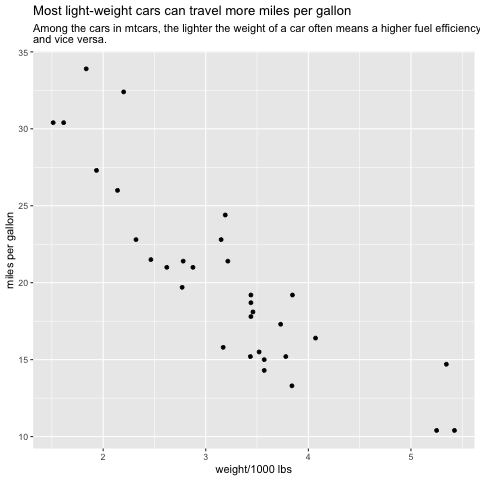

In [10]:
%%R

ggplot(mtcars) +
    aes(y=mpg, x=wt) +
    geom_point() +
    labs(x="weight/1000 lbs", y = "miles per gallon")+
    ggtitle('Most light-weight cars can travel more miles per gallon',
            subtitle='Among the cars in mtcars, the lighter the weight of a car often means a higher fuel efficiency, \nand vice versa.')

# 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight
  - It seems like the lighter weight a car, the higher its efficiency in general.
  - The two variables are not perfectly correlated.

    b. What can't we conclude about fuel efficiency and weight
  - We can't say for sure if there is a negative correlation between efficiency and weight.
    
    c. What further questions do you have about this data?
  - When visualized with other varibles, are there any other variables that show similar trend with the weight of cars?

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


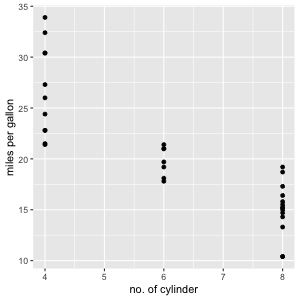

In [11]:
%%R -w 300 -h 300

ggplot(mtcars) +
    aes(y=mpg, x=cyl) +
    geom_point() +
    labs(x="no. of cylinder", y = "miles per gallon")
# A trend could be observed from this chart

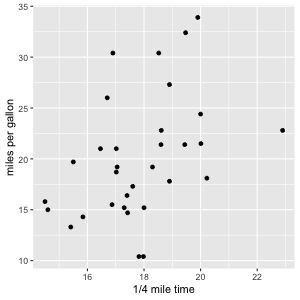

In [12]:
%%R -w 300 -h 300

ggplot(mtcars) +
    aes(y=mpg, x=qsec) +
    geom_point() +
    labs(x="1/4 mile time", y = "miles per gallon")
#  The two variables doesn't seem to be correlated

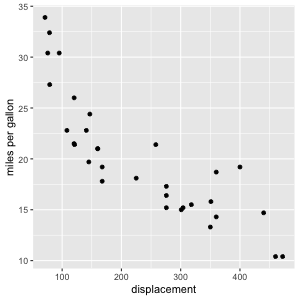

In [13]:
%%R -w 300 -h 300

ggplot(mtcars) +
    aes(y=mpg, x=disp) +
    geom_point() +
    labs(x="displacement", y = "miles per gallon")
#  A trend could be observed from this chart

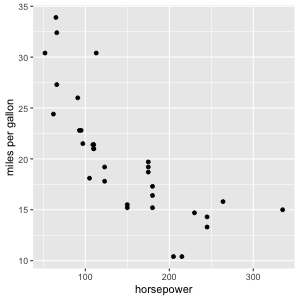

In [14]:
%%R -w 300 -h 300

ggplot(mtcars) +
    aes(y=mpg, x=hp) +
    geom_point() +
    labs(x="horsepower", y = "miles per gallon")

# It seems like cars with more horsepower are less efficient, but I can't say if one thing led to each other

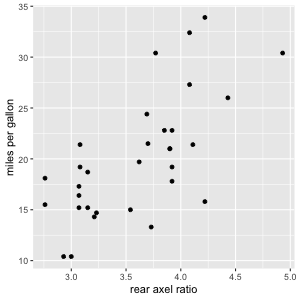

In [15]:
%%R -w 300 -h 300

ggplot(mtcars) +
    aes(y=mpg, x=drat) +
    geom_point() +
    labs(x="rear axel ratio", y = "miles per gallon")
# We can observe that dots with higher drat mostly have higher feul efficiency level,
# but some points are spread out in the middle, so there doesn't seem to be a clear correlation here

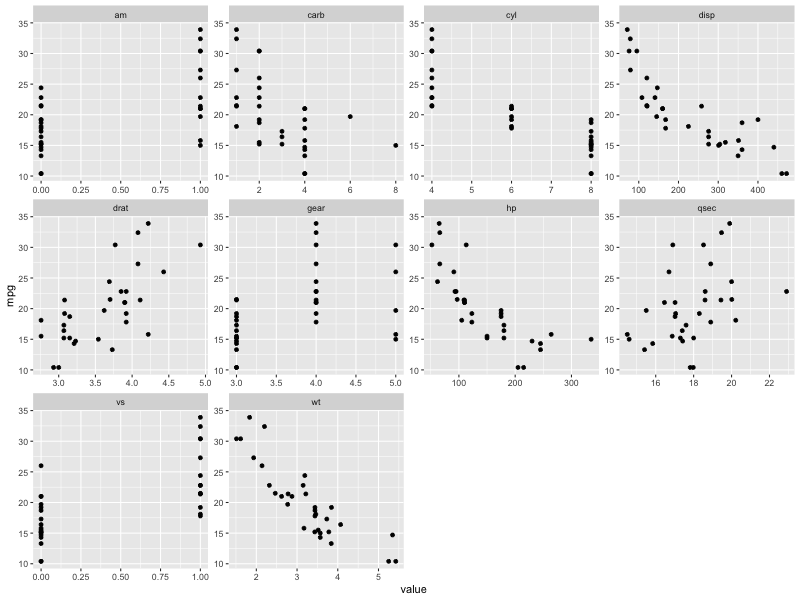

In [34]:
%%R -w 800 -h 600
mtcars %>% select(-name) %>%
  gather(-mpg, key = "var", value = "value") %>%
  ggplot(aes(x = value, y = mpg)) +
    geom_point() +
    facet_wrap(~ var, scales = "free") 

What make cars more efficient?
- Cars with fewer cylinders are more efficient, and vice versa
- Cars with less displacement usually are more efficient, and vice versa
- Cars with higher lower horsepower tend to be more efficient, and vice versa
- Cars with higher rear axel ratio usually are more efficient, but it doesn't mean that cars with lower rear axel ratio must be less efficient

Note: I tried to plot mpg against all the other variables (see above), but a few plots seem to look different than when they are being plotted individually.


## Part 2 (freeform inquiry)
Ask and try to answer your own questions about the dataset. Make at least two such charts below:


# 👉 Question 1: TKTK

What makes the horsepower of a car higher?

### 👉 Charts or summary statistics to help answer your question

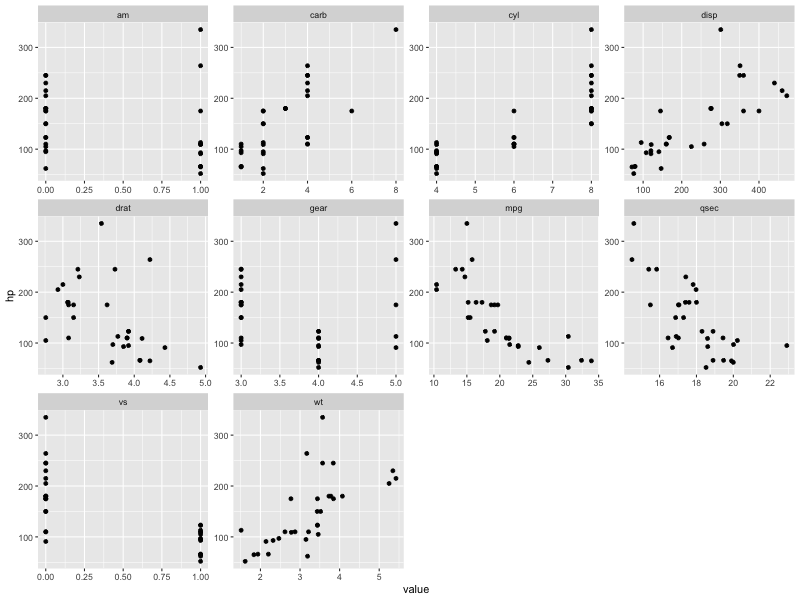

In [32]:
%%R -w 800 -h 600
mtcars %>% select(-name) %>%
  gather(-hp, key = "var", value = "value") %>%
  ggplot(aes(x = value, y = hp)) +
    # scale_x_continuous()+
    geom_point() +
    facet_wrap(~ var, scales = "free") 

# ggplot code here

### 👉 Reflection

a. What can we conclude?
- Generlly, the more cylinders the car has, the higher the horsepower. (except for one car in the dataset)
- Cars with a higher quartermile time usually have a higher horsepower.
- Most cars with v-shaped cylinder configuration (vs=0)  have a higher horsepower.
- Generally speaking, cars with higher displacement would also have higher (than average) horsepower.
- Cars that have more feul efficiency usually have more horsepower.

b. What can't we conclude?
- We can't conclude whether the these variables (mentioned above) causes the horsepower to be higher, or if these are the result of a high horsepower.
- We can only tell that these variables might be correlated to horsepower, but we can't decide whether there's a causation.
- We also can't say for sure that these variables are correlated: what if some variables happen to look like they are correlated?

c. What further questions does this analysis raise?
- if we plot three dimensions in one chart, will it tell more information about whether some variables are correlated or no?
- How to know if A leads to B or if B leads to A?
- Can we make claims about correlation between two variables by eyeballing the data/plots.. ever?

